### Test notebook for functionality of written functions, modules, etc

# Icepyx - Read object

Here I'm going to test the functionality of the icepyx Read object for reading in the ICESat-2 data as an xarray format.

In [ ]:
# required imports
import icepyx as ipx
import xarray as xr
import os

In [ ]:
# define where to find the files, etc
datafolder = '/home/users/eeasm/ICESAT_data/RGT0749_Cycles_10-12-bigger'
# changed to be a single file as I want to avoid any merging issues on my first try
files_list = os.listdir(datafolder)
print(files_list)

In [ ]:
# from https://icepyx.readthedocs.io/en/latest/example_notebooks/IS2_data_read-in.html
# we're gonna create the basic properties required for a ipx.Read object

pattern = "processed_ATL{product:2}_{datetime:%Y%m%d%H%M%S}_{rgt:4}{cycle:2}{orbitsegment:2}_{version:3}_{revision:2}.h5"
product = 'ATL09'

In [ ]:
reader = ipx.Read(data_source=datafolder, product=product, filename_pattern=pattern)
print(reader._filelist)

In [ ]:
#print(reader.vars.avail())
pass

In [ ]:
print(reader.vars.wanted)

In [ ]:
var_list = ['latitude','longitude','cab_prof']
reader.vars.append(var_list=var_list)

In [ ]:
print(reader.vars.wanted)

In [ ]:
ds = reader.load()

In [ ]:
ds

In [ ]:
ds.latitude.sel(gran_idx=74910).plot()

# load_xarray_from_ATL09

Testing my function's capabilities against icepyx

In [1]:
import numpy as np
import xarray as xr
import eeasm_icesat.atl09 as atl
import matplotlib.pyplot as plt

In [2]:
datafolder = '/home/users/eeasm/ICESAT_data/RGT0749_Cycles_10-12-bigger/processed_ATL09_20210211004659_07491001_005_01.h5'

ds_high, ds_low = atl.load_xarray_from_ATL09.load_xarray_from_ATL09(datafolder,get_low_rate=True, subsetVariables_low=atl.load_xarray_from_ATL09.SUBSET_LOW_CAL)

Frozen({'profile': 3, 'time_index': 6358, 'height': 700, 'layer': 10, 'surface type': 5})
Frozen({'profile': 3, 'time_index': 255, 'height': 700, 'layer': 10, 'surface type': 5})


In [4]:
ds_high

<xarray.Dataset>
Dimensions:                (profile: 3, time_index: 6358, height: 700,
                            layer: 10, surface type: 5)
Coordinates:
  * profile                (profile) int64 1 2 3
  * time_index             (time_index) int64 0 1 2 3 4 ... 6354 6355 6356 6357
  * height                 (height) float32 2e+04 1.997e+04 ... -925.5 -955.5
  * layer                  (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type           (surface type) int64 0 1 2 3 4
    d2s                    (profile, time_index) float64 899.4 899.1 ... 907.2
    height_AGL             (profile, time_index, height) float64 1.997e+04 .....
    time                   (profile, time_index) datetime64[ns] 2021-02-11T01...
Data variables: (12/73)
    aclr_true              (profile, time_index) float64 0.07434 0.07434 ... nan
    apparent_surf_reflec   (profile, time_index) float64 0.0 0.0 ... nan nan
    asr_cloud_probability  (profile, time_index) float64 100.0 100.0 ... nan nan
    backg_c                (profile, time_index) float64 0.06036 0.06036 ... nan
    backg_theoret          (profile, time_index) float64 0.0 0.0 0.0 ... nan nan
    beam_azimuth           (profile, time_index) float64 59.28 59.28 ... nan nan
    ...                     ...
    surface_h_dens         (profile, time_index) float64 nan nan nan ... nan nan
    surface_height         (profile, time_index) float64 nan nan ... nan nan
    surface_sig            (profile, time_index) float64 0.0 0.0 ... nan nan
    surface_thresh         (profile, time_index) float64 10.0 10.0 ... nan nan
    surface_width          (profile, time_index) float64 0.0 0.0 1.0 ... nan nan
    tx_pulse_energy        (profile, time_index) float64 9.361e-05 ... nan

In [5]:
ds_low

<xarray.Dataset>
Dimensions:       (profile: 3, time_index: 255, height: 700, layer: 10,
                   surface type: 5)
Coordinates:
  * profile       (profile) int64 1 2 3
  * time_index    (time_index) int64 0 1 2 3 4 5 6 ... 249 250 251 252 253 254
  * height        (height) float32 2e+04 1.997e+04 1.994e+04 ... -925.5 -955.5
  * layer         (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type  (surface type) int64 0 1 2 3 4
Data variables:
    cal_c         (profile, time_index) float64 8.223e+20 ... 9.181e+20
    delta_time    (profile, time_index) float64 9.824e+07 ... 9.824e+07
    ds_va_bin_h   (profile, height) float64 2e+04 1.997e+04 ... -925.5 -955.5
    latitude      (profile, time_index) float64 64.63 64.7 64.76 ... 80.5 80.56
    longitude     (profile, time_index) float64 -35.82 -35.84 ... -44.66 -44.74
    time          (profile, time_index) datetime64[ns] 2021-02-11T01:03:52 .....

In [3]:
ds_high = atl.add_coordinates.add_coordinates(ds_high)
ds_comb = atl.interp_low_to_high(ds_low, ds_high)
ds_comb

{'profile': array([1, 2, 3]), 'time_index': array([   0,    1,    2, ..., 6355, 6356, 6357])}


<xarray.Dataset>
Dimensions:                (profile: 3, time_index: 6358, height: 700,
                            layer: 10, surface type: 5)
Coordinates:
  * profile                (profile) int64 1 2 3
  * time_index             (time_index) int64 0 1 2 3 4 ... 6354 6355 6356 6357
  * height                 (height) float32 2e+04 1.997e+04 ... -925.5 -955.5
  * layer                  (layer) int64 0 1 2 3 4 5 6 7 8 9
  * surface type           (surface type) int64 0 1 2 3 4
    d2s                    (profile, time_index) float64 899.4 899.1 ... 907.2
    height_AGL             (profile, time_index, height) float64 1.997e+04 .....
    time                   (profile, time_index) datetime64[ns] 2021-02-11T01...
Data variables: (12/74)
    aclr_true              (profile, time_index) float64 0.07434 0.07434 ... nan
    apparent_surf_reflec   (profile, time_index) float64 0.0 0.0 ... nan nan
    asr_cloud_probability  (profile, time_index) float64 100.0 100.0 ... nan nan
    backg_c                (profile, time_index) float64 0.06036 0.06036 ... nan
    backg_theoret          (profile, time_index) float64 0.0 0.0 0.0 ... nan nan
    beam_azimuth           (profile, time_index) float64 59.28 59.28 ... nan nan
    ...                     ...
    surface_height         (profile, time_index) float64 nan nan ... nan nan
    surface_sig            (profile, time_index) float64 0.0 0.0 ... nan nan
    surface_thresh         (profile, time_index) float64 10.0 10.0 ... nan nan
    surface_width          (profile, time_index) float64 0.0 0.0 1.0 ... nan nan
    tx_pulse_energy        (profile, time_index) float64 9.361e-05 ... nan
    cal_c                  (profile, time_index) float64 8.223e+20 ... 9.181e+20

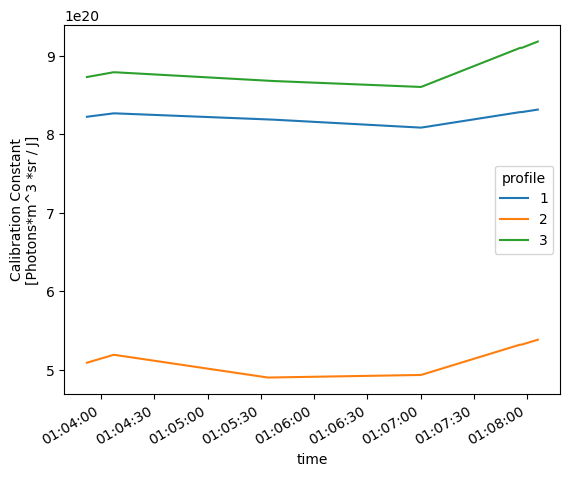

In [4]:
ds_comb.cal_c.plot(hue='profile',x='time')

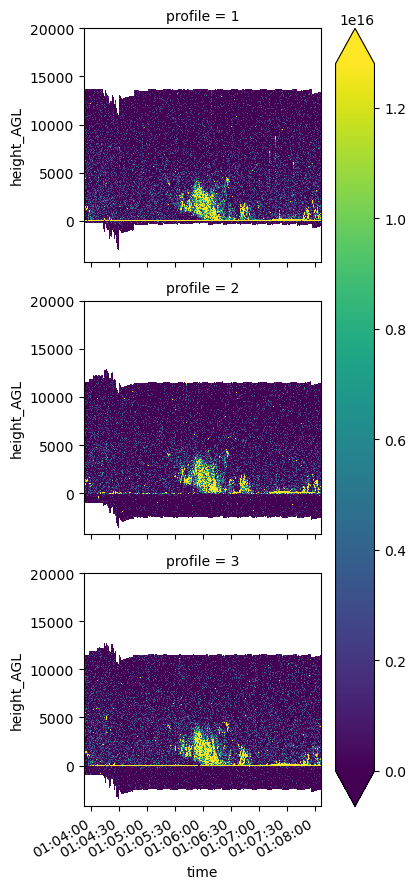

In [7]:
(ds_comb.cab_prof * ds_comb.cal_c).plot(x='time',y='height_AGL',col='profile',col_wrap=1, robust=True, vmin=0)

In [5]:
# test subsetting of variables
subset = ('cab_prof','latitude','longitude')
ds_sub = load_xarray_from_ATL09(datafolder,subset)
ds_sub

NameError: name 'load_xarray_from_ATL09' is not defined

In [ ]:
# plot the three profiles cab_prof values side by side
#fig, axs = plt.subplots(1,3,figsize = (16,7))

# extract the plotting values
plotVals = ds['cab_prof']

# plot where the cab_prof values are less than zero
#g_robust = plotVals.where(plotVals < cutoffVal).plot(x='time index', y='height', col='profile', col_wrap=3)

cutoffVal = 0
plotVals = plotVals.where(plotVals > cutoffVal,cutoffVal) # remove negative calibrated backscatter
# simple facet grid

# also remove grossly positive values
posCutoff = 1e38
#plotVals = plotVals.where(plotVals < posCutoff, posCutoff)


g_simple = plotVals.where(plotVals < posCutoff).plot(x='time_index', y='height', col='profile', col_wrap=1, robust=True)

In [ ]:
# calculate distance to Summit for each track:
summit_lat = 72.5813291830755
summit_lon = -38.45867106661449

# lambda functions for handling degrees inputs
sind = lambda degrees: np.sin(np.deg2rad(degrees))
cosd = lambda degrees: np.cos(np.deg2rad(degrees))

dot_prod = sind(ds['latitude'])*sind(summit_lat) + cosd(ds['latitude'])*cosd(summit_lat) * ( cosd(ds['longitude'])*cosd(summit_lon) + sind(ds['longitude'])*sind(summit_lon) )
a = 6400 # in km
distance_to_summit = np.arccos(dot_prod) * a

ds['d2s'] = distance_to_summit

tsel = xr.DataArray(np.arange(3000,3301),dims=['time_index'])
#tsel = ds.time_index

ds['d2s'].isel(time_index=tsel).plot(x='time_index',hue='profile')
ds

In [ ]:
ds = ds.set_coords('d2s')
ds

In [ ]:
# display a property against height, and a logarithmic scale
property = 'density_pass2'
ds[property].where(ds[property] < 1e38).where(ds[property] > 0).isel(time_index=3000,drop=True).plot(y='height', hue='profile',xscale='log')

In [ ]:
# display the mean of a property across a range of time indices
property = 'cab_prof'
cutoffPos = 1e-4 # 1e-4 # for cab_prof
tsel = xr.DataArray(np.arange(3000,3301),dims=['time_index'])
ds[property].where(ds[property] > 0).where(ds[property] < cutoffPos).isel(time_index=tsel).mean('time_index').plot(y='height', hue='profile',xscale='log')

In [ ]:
property = 'beam_azimuth'
#ds[property].plot(hue='profile')
ds['beam_elevation'].plot(hue='profile')

In [ ]:
print('Order of magnitude estimates for beam_elevation corrections')
print(f'sine ratio: {sind(89.84)/sind(89.57)}')
print(f'cosine ratio: {cosd(89.84)/cosd(89.57)}')
print(f'1/cos(2 theta) ratio: {cosd(2*89.57)/cosd(2*89.84)}')

In [ ]:
# having found that beam_elevation is different between the beams, correct for this by dividing by cos(elevation)
# display the mean of a property across a range of time indices
property = 'cab_prof'
cutoffPos = 1e-4 # 1e-4 # for cab_prof
tsel = xr.DataArray(np.arange(3000,3301),dims=['time_index'])

ds_sub = ds.isel(time_index=tsel)

elevation_corrected = ds_sub[property].where(ds_sub[property] > 0).where(ds_sub[property] < cutoffPos)

elevation_corrected = elevation_corrected * (-cosd(2*ds_sub['beam_elevation']))

elevation_corrected.mean('time_index').plot(y='height', hue='profile',xscale='log')
plt.xlabel('elevation corrected backscatter')

In [ ]:
# want to plot the detected surface height for all three profiles.
property = 'surface_height'
ds[property].where(ds[property] < 1e10).plot(x='d2s', hue='profile')

property = 'surface_h_dens'
ds[property].where(ds[property] < 1e10).plot(x='d2s', hue='profile')

In [ ]:
p1 = 'surface_height'
p2 = 'surface_h_dens'

(ds[p1] - ds[p2]).where(ds[p1] < 1e10).where(ds[p2] < 1e10).plot(x='time_index',hue='profile')

In [ ]:
# height_AGL
height_AGL = (-ds['surface_height'] + ds['ds_va_bin_h']).where(ds['surface_height'] <1e38).interpolate_na(dim='time_index',fill_value='extrapolate',keep_attrs=True)


ds['height_AGL'] = height_AGL
ds = ds.set_coords(['height_AGL'])
ds

In [ ]:
ds['height_AGL'].plot(x='time_index', y='height',col='profile',col_wrap=3)

In [ ]:
vals = ds['height_AGL'].interpolate_na(dim='time_index',fill_value='extrapolate').values
print(f'height_AGL: num nan = {np.sum(np.isnan(vals))}')
print(f'height_AGL: max = {np.max(vals)}')
print(f'height_AGL: min = {np.min(vals)}')
del vals

In [ ]:
p = 'cab_prof'

ds[p].where(ds[p] > 0,0).where(ds[p] < 1e38).plot.pcolormesh(x='time_index_', y='height_AGL', col='profile',col_wrap=1)

In [ ]:
time_index_ = xr.ones_like(ds['cab_prof']) * ds['time_index']
ds['time_index_'] = time_index_
ds = ds.set_coords('time_index_')

p = 'cab_prof'

#ds[p].where(ds[p] > 0,0).where(ds[p] < 1e38).plot(x='time_index_', y='height_AGL', col='profile',col_wrap=1, ylim=[0,5000])

In [ ]:
ds['time_index_'].plot(x='time_index',y='height',col='profile',col_wrap=3)

In [ ]:
ds

In [ ]:
X = ds.sel(profile=1).time_index_.values
Y = ds.sel(profile=1).height_AGL.values
C = ds.sel(profile=1).where(ds['cab_prof'] < 1e38).cab_prof.values

plt.pcolormesh(X,Y,C)